In [ ]:
using PyPlot


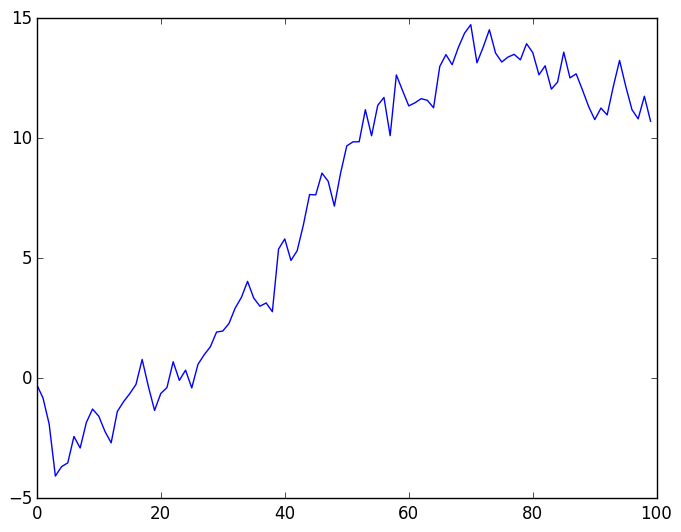

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x11ac80510>

In [5]:
plot(cumsum(randn(100)))

In [6]:
using Interact

In [7]:
@manipulate  for i=1:5
    i
end

Slider{Int64}([Input{Int64}] 3,"i",3,1:5)

3

In [1]:
11+2+10

23

In [4]:
using Color, Compose
Compose.set_default_graphic_size(4inch, 4inch)

Slider{Int64}([Input{Int64}] 4,"n",4,1:8)

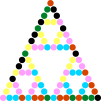

In [5]:

const colors = distinguishable_colors(6)
function sierpinski(n, colorindex=1)
    if n == 0
        compose(context(), circle(0.5,0.5,0.5), fill(colors[colorindex]))
    else
        colorindex = colorindex % length(colors) + 1
        t1 = sierpinski(n - 1, colorindex)
        colorindex = colorindex % length(colors) + 1
        t2 = sierpinski(n - 1, colorindex)
        colorindex = colorindex % length(colors) + 1
        t3 = sierpinski(n - 1, colorindex)
        compose(context(),
                (context(1/4,   0, 1/2, 1/2), t1),
                (context(  0, 1/2, 1/2, 1/2), t2),
                (context(1/2, 1/2, 1/2, 1/2), t3))
    end
end

@manipulate for n = 1:8
    sierpinski(n)
end

In [6]:
# n steps of Newton iteration for sqrt(a), starting at x
function newton(a, x, n)
    for i = 1:n
        x = 0.5 * (x + a/x)
    end
    return x
end

# output x as HTML, with digits matching x0 printed in bold
function matchdigits(x::Number, x0::Number)
    s = string(x)
    s0 = string(x0)
    buf = IOBuffer()
    matches = true
    i = 0
    print(buf, "<b>")
    while (i += 1) <= length(s)
        i % 70 == 0 && print(buf, "<br>")
        if matches && i <= length(s0) && isdigit(s[i])
            if s[i] == s0[i]
                print(buf, s[i])
                continue
            end
            print(buf, "</b>")
            matches = false
        end
        print(buf, s[i])
    end
    matches && print(buf, "</b>")
    html(takebuf_string(buf))
end

set_bigfloat_precision(1024)
sqrt2 = sqrt(big(2))
@manipulate for n in slider(0:9, value=0, label="number of Newton steps:")
     matchdigits(newton(big(2), 2, n), sqrt2)
end

Slider{Int64}([Input{Int64}] 0,"number of Newton steps:",0,0:9)

HTML("","<b></b>2")

In [7]:
function matmul_ijk(a,b,stop)
    step=0
    n=size(a,1)
    c=zeros(a)
    for i=1:n, j=1:n, k=1:n  
        if step==stop;  return(c); end
          c[i,j] +=  a[i,k] * b[k,j]
        step+=1
    end
    c
end



n=10
o=int(ones(n,n))
@manipulate for stop=0:n^3
    matmul_ijk(o,o,stop)
end



Slider{Int64}([Input{Int64}] 500,"stop",500,0:1000)

10x10 Array{Int64,2}:
 10  10  10  10  10  10  10  10  10  10
 10  10  10  10  10  10  10  10  10  10
 10  10  10  10  10  10  10  10  10  10
 10  10  10  10  10  10  10  10  10  10
 10  10  10  10  10  10  10  10  10  10
  0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0

In [12]:
function matmul_kji(a,b,stop)
    step=0
    n=size(a,1)
    c=zeros(a)
    for k=1:n, j=1:n, i=1:n  
        if step==stop;  return(c); end
        c[i,j] +=  a[i,k] * b[k,j]
        step+=1
    end
    c
end

n=10
o=int(ones(n,n))
@manipulate for stop=0:n^3
    matmul_kji(o,o,stop)
end

Slider{Int64}([Input{Int64}] 500,"stop",500,0:1000)

10x10 Array{Int64,2}:
 5  5  5  5  5  5  5  5  5  5
 5  5  5  5  5  5  5  5  5  5
 5  5  5  5  5  5  5  5  5  5
 5  5  5  5  5  5  5  5  5  5
 5  5  5  5  5  5  5  5  5  5
 5  5  5  5  5  5  5  5  5  5
 5  5  5  5  5  5  5  5  5  5
 5  5  5  5  5  5  5  5  5  5
 5  5  5  5  5  5  5  5  5  5
 5  5  5  5  5  5  5  5  5  5

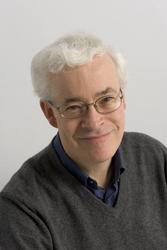

In [10]:
using Images, Interact, Color  #Ignore warnings
#run(`wget --no-check-certificate https://www2.maths.ox.ac.uk/new.direction2015/images/trefethen_color.jpg`)
A=imread("trefethen_color.jpg")

In [11]:
#svd the three component arrays in the image
arrays = float(separate(A.data))
uR,sR,vR=svd(arrays[:,:,1])
uG,sG,vG=svd(arrays[:,:,2])
uB,sB,vB=svd(arrays[:,:,3]);

Slider{Int64}([Input{Int64}] 15,"k",15,1:30)

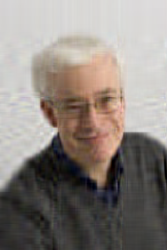

In [12]:
# Reconstruct a rank k version of the picture
@manipulate for k=1:30
    Image(map(RGB, 
    uR[:,1:k]*diagm(sR[1:k])*vR[:,1:k]',
    uG[:,1:k]*diagm(sG[1:k])*vG[:,1:k]',
    uB[:,1:k]*diagm(sB[1:k])*vB[:,1:k]'))'
end